## Disease prediction
In this section, we will work with a dataset containing data on cardiovascular disease. Begin by downloading the <a href="https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset">dataset from Kaggle</a> and read about what the different features mean. Note that this dataset contains many inaccuracies, such as negative blood pressure and blood pressure that is impossibly high.

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/cardio_train.csv',
                sep = ';', index_col = False).iloc[:, 1:] # exclude id column

In [244]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


Data description

There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

## Finding inaccuracies

0 Age
- Check for negative or extreme values
- Convert age from days to years ```(lambda x: round(x/365.25))```

1 Gender
- Check values
- Replace 0 with man and 1 with woman
 
2 Height
3 Weight
- Check for incorrectly inputed self-reported data
- Create BMI column 
- Remove BMI < 14 & > 50 ```(mask = (df['bmi'] >= 14) & (df['bmi'] <= 50))```

4 ap_hi (Systolic BP)<br>
5 ap_lo (Diastolic BP)
- Check for unrealistic BP values
- Remove values

 6   cholesterol  
 7   gluc         
 8   smoke        
 9   alco         
 10  active       
 11  cardio         

## Finding inaccuracies 0: Age

In [246]:
# Convert days to year for age column
df['age'] = df['age'].apply(lambda x: round(x/365.25))

In [247]:
df['age'].min(), df['age'].max(), df['age'].mean()

(30, 65, 53.303157142857145)

In [248]:
len(df['age'].unique())

28

Text(0.5, 1.0, 'Age distribution')

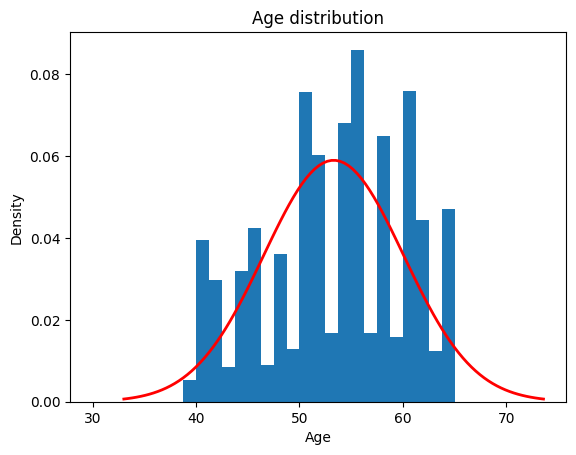

In [249]:
import numpy as np
plt.hist(df['age'], bins=len(df['age'].unique()), density=True)

# Overlay a normal distribution curve
mu, std = df['age'].mean(), df['age'].std()
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2)), linewidth=2, color='r')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age distribution')

No inaccuracies found. Interesting spread though.

---

## Finding inaccuracies 1: Gender

In [250]:
df['gender'].unique(), df['gender'].value_counts()

(array([2, 1]),
 1    45530
 2    24470
 Name: gender, dtype: int64)

In [251]:
df['gender'].replace({1: 'woman', 2: 'man'}, inplace = True)

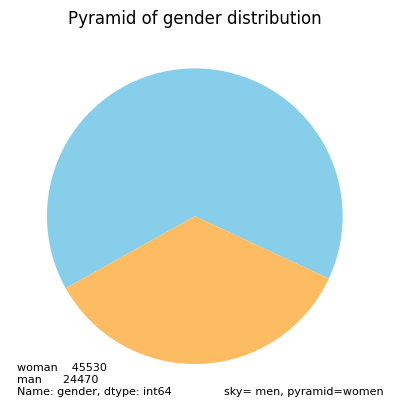

In [252]:
plt.pie(df['gender'].value_counts(), startangle=-25, colors=['#87ceeb','#fdbc62', ])
plt.title('Pyramid of gender distribution')
plt.text(s="sky= men, pyramid=women",x=0.2,y=-1.2,fontsize=8)
plt.text(s=f"{df['gender'].value_counts()}",x=-1.2,y=-1.2,fontsize=8)
plt.show()

No inaccuracies found.

---

## Finding inaccuracies 2 & 3: Height & Weight

In [253]:
df['height'].mean(), df['weight'].mean(), df['weight'].min(), df['height'].min(), df['weight'].max(), df['height'].max()

(164.35922857142856, 74.20569, 10.0, 55, 200.0, 250)

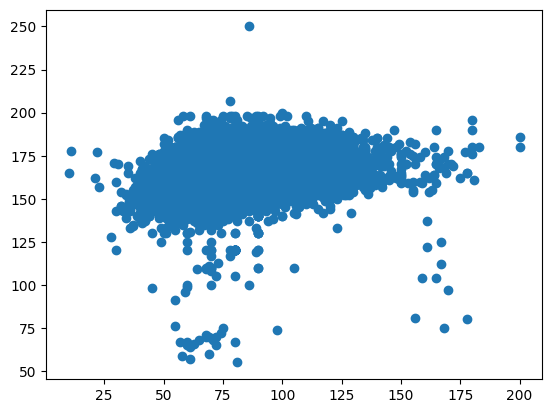

In [254]:
plt.scatter(y=df['height'],x=df['weight'])

In [255]:
def get_bmi(weight,height):
    return weight / (height*0.01)**2

get_bmi(62.2,188)

17.598460842009956

In [256]:
df['bmi'] = df.apply(lambda x: get_bmi(x['weight'], x['height']), axis=1)

In [257]:
df['bmi'].sort_values()

33817      3.471784
57858      3.673095
29488      7.022248
60188      8.001829
26806      9.331007
            ...    
29157    191.666667
23913    237.768633
22723    267.768595
27384    278.125000
12770    298.666667
Name: bmi, Length: 70000, dtype: float64

I consulted a doctor, she told me <em>One cannot have a BMI below 10 or above 50.</em> I said ok doc.

"man kan leva när man e över 30 (BMI) men d svår att leva om man e mer på d låga" - doktor

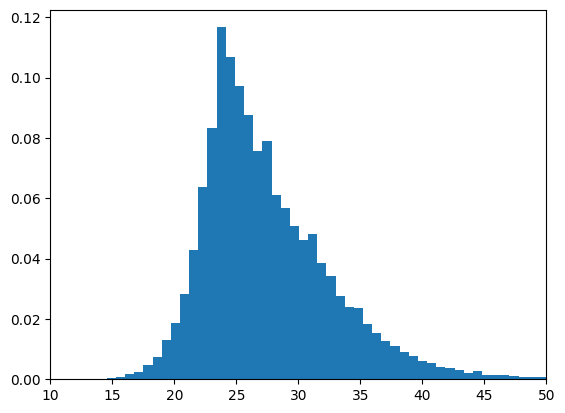

In [258]:
plt.hist(df['bmi'], bins=400, density=True)
plt.xlim(10,50)
plt.show()


In [259]:
# Drop all rows with BMI < 10 and > 50
mask = (df['bmi'] >= 14) & (df['bmi'] <= 50)
df = df.drop(df[~mask].index)

In [260]:
print(f'{len(mask) - len(df)} rows removed due to unrealistic BMI.')

257 rows removed due to unrealistic BMI.


---

## Finding inaccuracies 4 & 5: Systolic & Diastolic BP (ap_hi, ap_lo)

In [261]:
print(df['ap_hi'].min(), df['ap_lo'].min())
print(df['ap_hi'].max(), df['ap_lo'].max())

-150 -70
16020 11000


In [262]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


Once again I consulted a doctor. She told me she was busy and to do my own work. So I tried the good ol google.

Optimal blood pressure is less than 120/80[mm Hg]* (systolic/diastolic).$^{[1]}$

When an individual is approaching death, the systolic blood pressure will typically drop below 95mm Hg.$^{[2]}$

Hypertensive crisis: higher than 180 systolic and/or higher than 120 diastolic.$^{[3]}$

<p>*editor's note</p>

$[1]$ https://www.webmd.com/heart/understanding-low-blood-pressure-basics <br>
$[2]$ https://www.crossroadshospice.com/hospice-resources/end-of-life-signs/blood-pressure/ <br>
$[3]$ https://www.healthline.com/health/diastole-vs-systole#blood-pressure-ranges <br>



In [263]:
# Drop all rows with ap_hi (systolic) < 95 and > 190
mask1 = (df['ap_hi'] >= 95) & (df['ap_hi'] <= 190)
df = df.drop(df[~mask1].index)

In [264]:
# Drop all rows with ap_lo (diastolic) < 70 and > 130
mask2 = (df['ap_lo'] >= 50) & (df['ap_lo'] <= 130)
df = df.drop(df[~mask2].index)

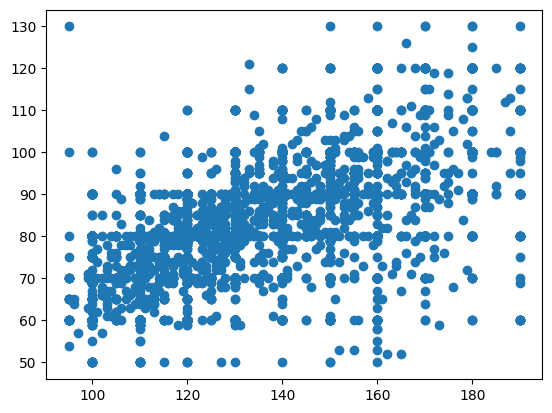

In [265]:
plt.scatter(x=df['ap_hi'],y=df['ap_lo'])

In [274]:
70000 - len(mask1) + 70000 - len(mask2) 

2029

2029 rows removed due to unrealistic BP.

Diastolic blood pressure cannot be higher than systolic blood pressure, but how big can the difference be?

---

## Finding inaccuracies 6-11: Cholesterol, Glucose, Smoking, Alcohol, Physical Activity, Cardiovascular Disease

In [284]:
columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

for col in columns:
    print(df[col].value_counts())

1    50417
2     9061
3     7753
Name: cholesterol, dtype: int64
1    57196
3     5124
2     4911
Name: gluc, dtype: int64
0    61306
1     5925
Name: smoke, dtype: int64
0    63638
1     3593
Name: alco, dtype: int64
1    54017
0    13214
Name: active, dtype: int64
0    33712
1    33519
Name: cardio, dtype: int64


No inaccuracies found.

---

In [285]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


## 2.0 - EDA uppvärmning

In [442]:
# a) How many people are positive for cardiovascular disease and how many are negative?

print(f"{df['cardio'].value_counts()[0]} negative.")
print(f"{df['cardio'].value_counts()[1]} positive.")

33712 negative.
33519 positive.


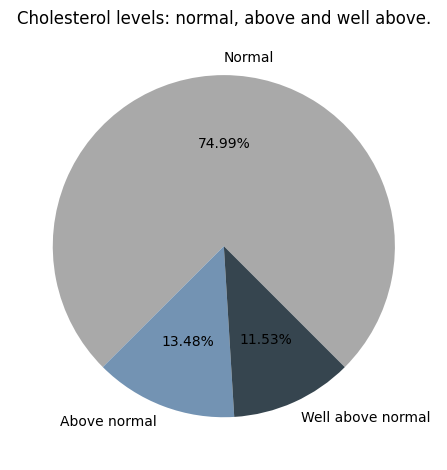

In [365]:
# b) What percentage of people have normal, above normal, and well above normal cholesterol levels? Create a pie chart.

labels = ['Normal', 'Above normal', 'Well above normal']
chol_vals = df['cholesterol'].value_counts()
pieces = [chol_vals.loc[1],chol_vals.loc[2],chol_vals.loc[3]]

colors = ['#A9A9A9','#7393B3','#36454F']
 
fig1, ax1 = plt.subplots()
ax1.pie(pieces, colors = colors, labels=labels, autopct='%1.2f%%', startangle=-45)
plt.title('Cholesterol levels: normal, above and well above.')
fig = plt.gcf()
plt.tight_layout()
plt.show()

(array([4.0000e+00, 0.0000e+00, 2.9680e+03, 3.9140e+03, 6.9640e+03,
        9.1400e+03, 1.3519e+04, 8.6720e+03, 1.3244e+04, 8.8060e+03]),
 array([30. , 33.5, 37. , 40.5, 44. , 47.5, 51. , 54.5, 58. , 61.5, 65. ]),
 <BarContainer object of 10 artists>)

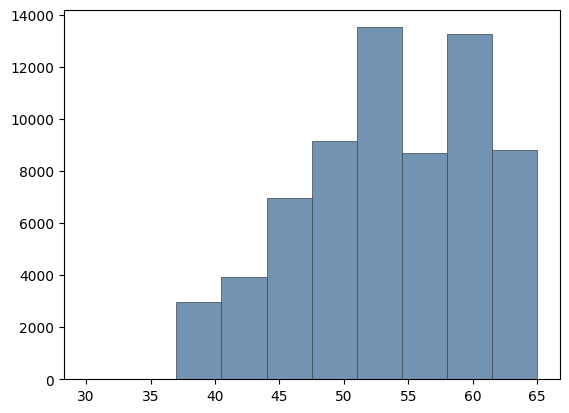

In [439]:
# c) What is the age distribution? Create a histogram.
plt.hist(df['age'], ec='#36454F', color='#7393B3', lw=0.5)

In [387]:
#d) What percentage of people smoke?
df['smoke'].value_counts(normalize=True)*100

0    91.187101
1     8.812899
Name: smoke, dtype: float64

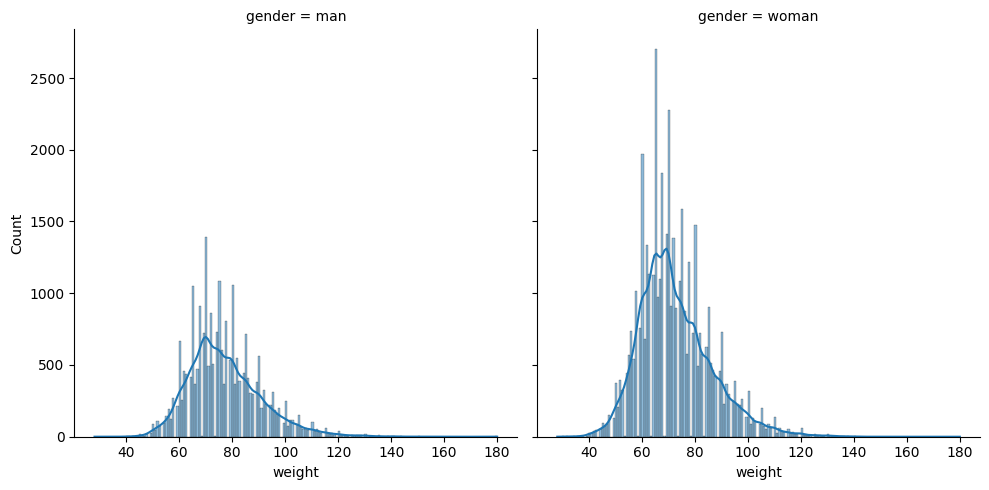

In [388]:
# e) What is the weight distribution? Create a suitable diagram.
sns.displot(df, x="weight", col="gender", kde=True)

In [389]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


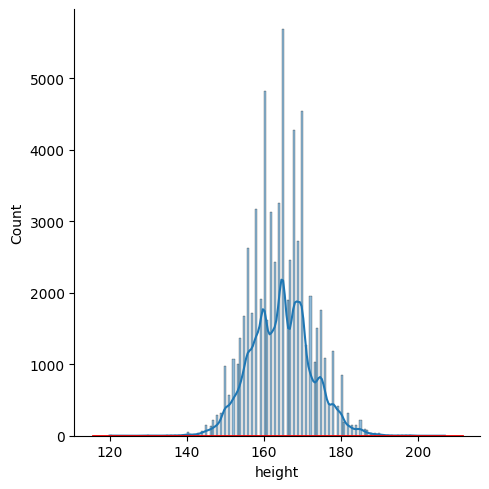

In [411]:
# f) What is the height distribution? Create a suitable diagram.
sns.displot(df,x="height", kde=True)

In [491]:
grouped_gender.head()

gender
man      50.055015
woman    49.748859
Name: cardio, dtype: float64

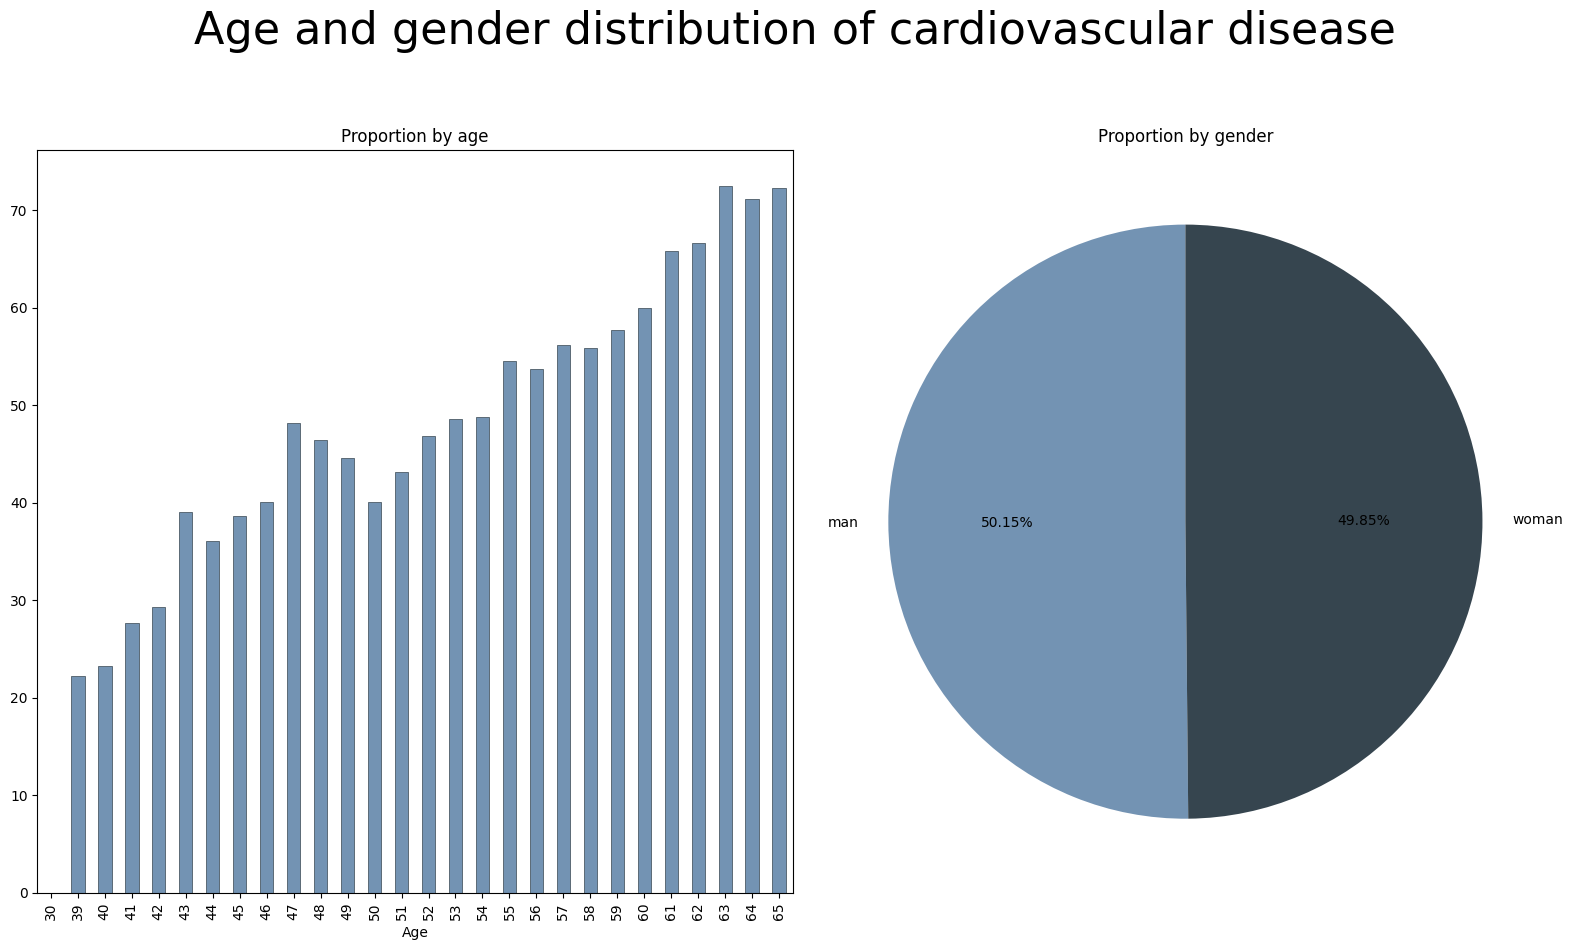

In [504]:
# g) What percentage of women and men have cardiovascular disease? Create a suitable diagram.

grouped_age = df.groupby('age')['cardio'].mean() * 100
grouped_gender = df.groupby('gender')['cardio'].mean() * 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))

grouped_age.plot(kind='bar', ax=ax1, ec='#36454F', color='#7393B3', lw=0.5)
ax1.set_xlabel('Age')
ax1.set_title('Proportion by age')

grouped_gender.plot(kind='pie', ax=ax2, colors=['#7393B3', '#36454F'], startangle=90, autopct='%1.2f%%')
ax2.set_title('Proportion by gender')
ax2.axes.yaxis.set_visible(False)

fig.suptitle('Age and gender distribution of cardiovascular disease', fontsize=32, y=1.05)
plt.tight_layout()
plt.show()


## 2.1.0 - Feature engineering BMI 

Skapa en feature för BMI (Body Mass Index), läs på om <a href="https://en.wikipedia.org/wiki/Body_mass_index">formeln på wikipedia</a>.

a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv hur du kommer fram till gränserna.

b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III).

## 2.1.1 - Feature engineering blodtryck

Släng bort samples med orimliga blodtryck och outliers. Likt uppgift 2.1.0 är det inte trivialt att sätta gränserna. Skapa en feature för blodtryckskategorier enligt <a href="https://www.healthline.com/health/high-blood-pressure-hypertension#definition">tabellen i denna artikel</a>. Beskriv hur du kommer fram till gränserna.

## 2.2.0 - Visualiseringar andel sjukdomar

Skapa barplots med en feature mot andelen positiva för hjärt-kärl sjukdom. Exempelvis blodtryckskategorier mot andel positiva, BMI kategori mot andel positiva mm. Gör dessa plots i en figur med flera subplots.

## 2.2.1 - Visualiseringar korrelation

Skapa en heatmap av korrelationer och se om du hittar features som är starkt korrelerade, dvs nära 1 eller features som är starkt negativt korrelerade, dvs nära -1. Kan du förklara varför de kan vara korrelerade?

## 2.3 - Skapa två dataset

Skapa en kopia av ditt dataframe. På ena dataframet:

- ta bort följande features: *ap_hi, ap_lo, height, weight, BMI*
- gör one-hot encoding på *BMI-kategori, blodtryckskategori och kön*

På andra dataframet:

- ta bort följande features: *BMI-kategori, blodtryckskategori, height, weight*
- gör en one-hot encoding på kön

## 2.4 - Välja modell

Välj 3-5 maskininlärningsmodeller, gärna så olika som möjligt. För varje dataset som vi skapade i uppgift 2.3 gör följande:

- train|validation|test split
- skala datasetet med feature standardization och normalization (de görs inte samtidigt, utan i olika omgångar)
- definiera hyperparametrar (param_grids) att testa för varje modell
- använda ```GridSearchCV()``` och välja lämplig evalueringsmetric
- gör prediction på valideringsdata beräkna och spara evaluation score för ditt valda metric
- checka bästa parametrarna för respektive modell

Vilket dataset väljer du och vilken modell väljer du? Använd den modellen du valt och träna på all data förutom testdatan.

## 2.5 Ensemble

Använd ```VotingClassifier()```på datasetet som du valt och lägg in de bästa parametrarna för respektive modell.

## 2.6 Evalueringar

Gör confusion matrices och classification reports för 2.4 och 2.5

## 2.7 "Deploy" - spara modell

Börja med att plocka ut 100 slumpmässigt valda rader från ditt dataset. Exportera dessa 100 samples i **test_samples.csv**. Därefter tar du den bästa modellen och träna på all data vi har förutom de 100 datapunkterna du plockade ut. Spara därefter modellen i en .pkl-fil med hjälp av ```joblib.dump()```. För modellen kan du behöva använda argumentet compress för att komprimera om filstorleken för stor.

## 2.8 Ladda modellen

Skapa ett nytt skript: **production_model.py**, ladda in **test_samples.csv** och din modell. Använd
```joblib.load()``` för att ladda in en .pkl-fil. Gör prediction på de 100 datapunkterna och exportera en fil "prediction.csv" som ska innehålla kolumnerna med ifyllda värden:

- probability class 0
- probability class 1
- prediction

